<a href="https://colab.research.google.com/github/anagvillanueva/MineriaDeDatos/blob/main/Notas_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 21/02/2024

Pastebin: https://pastebin.com/nNgDpmMr (a partir de la 46)

In [ ]:
import pandas as pd
# Dataset
from sklearn.datasets import fetch_openml
# Metricas
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    # plot_confusion_matrix,
    classification_report,
    precision_recall_curve
)
# Modelo
from sklearn.tree import DecisionTreeClassifier # árbol de decisión para clasificación
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate, cross_val_score
# Crea los pedazos del dataset
from sklearn.model_selection import KFold
import seaborn as sns
import matplotlib.pyplot as plt

# Elimina los warninigs
import warnings
warnings.filterwarnings("ignore")
#Graficas dentro del notebook
%matplotlib inline


Traemos el dataset

In [ ]:
heart = fetch_openml(name="heart-statlog")
# Variables del dataset
heart.feature_names

['age',
 'sex',
 'chest',
 'resting_blood_pressure',
 'serum_cholestoral',
 'fasting_blood_sugar',
 'resting_electrocardiographic_results',
 'maximum_heart_rate_achieved',
 'exercise_induced_angina',
 'oldpeak',
 'slope',
 'number_of_major_vessels',
 'thal']

In [ ]:
# Clase objetivo
print(heart.target_names)
# Valores
print(heart.target)

['class']
0      present
1       absent
2      present
3       absent
4       absent
        ...   
265     absent
266     absent
267     absent
268     absent
269    present
Name: class, Length: 270, dtype: category
Categories (2, object): ['absent', 'present']


In [ ]:
# Datos (que aunque ya vienen como un pandas, es bueno crear nuestro propio df)
print(heart.data)

      age  sex  chest  resting_blood_pressure  serum_cholestoral  \
0    70.0  1.0    4.0                   130.0              322.0   
1    67.0  0.0    3.0                   115.0              564.0   
2    57.0  1.0    2.0                   124.0              261.0   
3    64.0  1.0    4.0                   128.0              263.0   
4    74.0  0.0    2.0                   120.0              269.0   
..    ...  ...    ...                     ...                ...   
265  52.0  1.0    3.0                   172.0              199.0   
266  44.0  1.0    2.0                   120.0              263.0   
267  56.0  0.0    2.0                   140.0              294.0   
268  57.0  1.0    4.0                   140.0              192.0   
269  67.0  1.0    4.0                   160.0              286.0   

     fasting_blood_sugar  resting_electrocardiographic_results  \
0                    0.0                                   2.0   
1                    0.0                           

In [ ]:
df = pd.DataFrame(heart.data)
df['class'] = heart['target']
df.shape

(270, 14)

In [ ]:
df

,age,sex,chest,resting_blood_pressure,serum_cholestoral,fasting_blood_sugar,resting_electrocardiographic_results,maximum_heart_rate_achieved,exercise_induced_angina,oldpeak,slope,number_of_major_vessels,thal,class
0,70.0,1.0,4.0,130.0,322.0,0.0,2.0,109.0,0.0,2.4,2.0,3.0,3.0,present
1,67.0,0.0,3.0,115.0,564.0,0.0,2.0,160.0,0.0,1.6,2.0,0.0,7.0,absent
2,57.0,1.0,2.0,124.0,261.0,0.0,0.0,141.0,0.0,0.3,1.0,0.0,7.0,present
3,64.0,1.0,4.0,128.0,263.0,0.0,0.0,105.0,1.0,0.2,2.0,1.0,7.0,absent
4,74.0,0.0,2.0,120.0,269.0,0.0,2.0,121.0,1.0,0.2,1.0,1.0,3.0,absent
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,52.0,1.0,3.0,172.0,199.0,1.0,0.0,162.0,0.0,0.5,1.0,0.0,7.0,absent
266,44.0,1.0,2.0,120.0,263.0,0.0,0.0,173.0,0.0,0.0,1.0,0.0,7.0,absent
267,56.0,0.0,2.0,140.0,294.0,0.0,2.0,153.0,0.0,1.3,2.0,0.0,3.0,absent
268,57.0,1.0,4.0,140.0,192.0,0.0,0.0,148.0,0.0,0.4,2.0,0.0,6.0,absent


In [ ]:
# Pequeño analisis exploratorio (Viendo como estan nuestros datos)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                                Non-Null Count  Dtype   
---  ------                                --------------  -----   
 0   age                                   270 non-null    float64 
 1   sex                                   270 non-null    float64 
 2   chest                                 270 non-null    float64 
 3   resting_blood_pressure                270 non-null    float64 
 4   serum_cholestoral                     270 non-null    float64 
 5   fasting_blood_sugar                   270 non-null    float64 
 6   resting_electrocardiographic_results  270 non-null    float64 
 7   maximum_heart_rate_achieved           270 non-null    float64 
 8   exercise_induced_angina               270 non-null    float64 
 9   oldpeak                               270 non-null    float64 
 10  slope                                 270 non-null    float64 
 11  number

In [ ]:
# Ver el porcentaje de datos faltantes
round(df.isnull().sum() / df.isnull().count() * 100, 2)

age                                     0.0
sex                                     0.0
chest                                   0.0
resting_blood_pressure                  0.0
serum_cholestoral                       0.0
fasting_blood_sugar                     0.0
resting_electrocardiographic_results    0.0
maximum_heart_rate_achieved             0.0
exercise_induced_angina                 0.0
oldpeak                                 0.0
slope                                   0.0
number_of_major_vessels                 0.0
thal                                    0.0
class                                   0.0
dtype: float64

In [ ]:
# Analisis univariado
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,270.0,54.433333,9.109067,29.0,48.0,55.0,61.0,77.0
sex,270.0,0.677778,0.468195,0.0,0.0,1.0,1.0,1.0
chest,270.0,3.174074,0.950090,1.0,3.0,3.0,4.0,4.0
resting_blood_pressure,270.0,131.344444,17.861608,94.0,120.0,130.0,140.0,200.0
serum_cholestoral,270.0,249.659259,51.686237,126.0,213.0,245.0,280.0,564.0
fasting_blood_sugar,270.0,0.148148,0.355906,0.0,0.0,0.0,0.0,1.0
resting_electrocardiographic_results,270.0,1.022222,0.997891,0.0,0.0,2.0,2.0,2.0
maximum_heart_rate_achieved,270.0,149.677778,23.165717,71.0,133.0,153.5,166.0,202.0
exercise_induced_angina,270.0,0.329630,0.470952,0.0,0.0,0.0,1.0,1.0
oldpeak,270.0,1.050000,1.145210,0.0,0.0,0.8,1.6,6.2


In [ ]:
# Analisis univariado de columnas categoricas
df.describe(include=["category"]).T

,count,unique,top,freq
class,270,2,absent,150


In [ ]:
df['class'].value_counts()

absent     150
present    120
Name: class, dtype: int64

In [ ]:
# Ver columnas categoricas y sus valores
for i in df.describe(include=['category']).columns:
  print(f"Datos unicos para {i}:")
  print(df[i].value_counts())
  print("*" * 50)

Datos unicos para class:
absent     150
present    120
Name: class, dtype: int64
**************************************************


Siempre es bueno realizar un preprosesamiento de los datos (normalizarlos, inmutarlos) para esto es bueno tener una copia de los datos para tener el dataset original sin mutaciones

In [ ]:
# Preprosesamiento de los datos
data = df.copy()

In [ ]:
# En lugar de tener absent y present, vamos a tener 0s y 1s
data['class'].replace("absent", 0, inplace=True)
data['class'].replace("present", 1, inplace=True)
data['class'].value_counts()

0    150
1    120
Name: class, dtype: int64

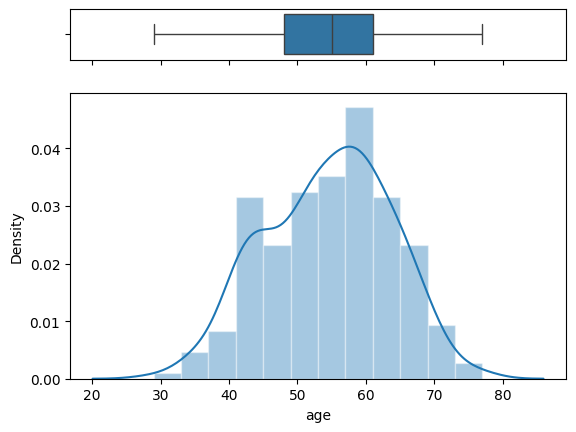

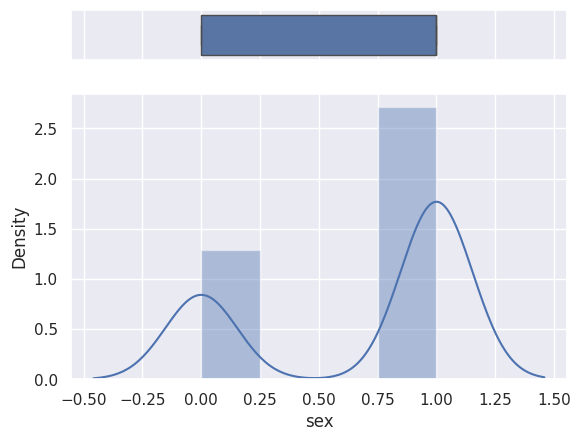

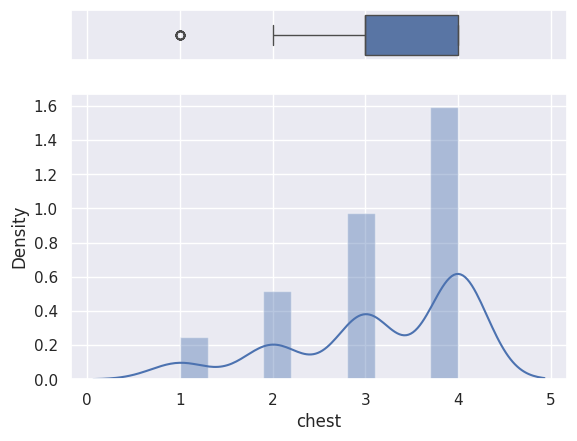

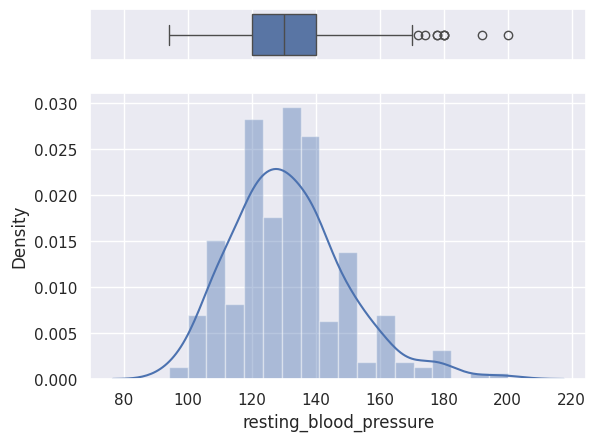

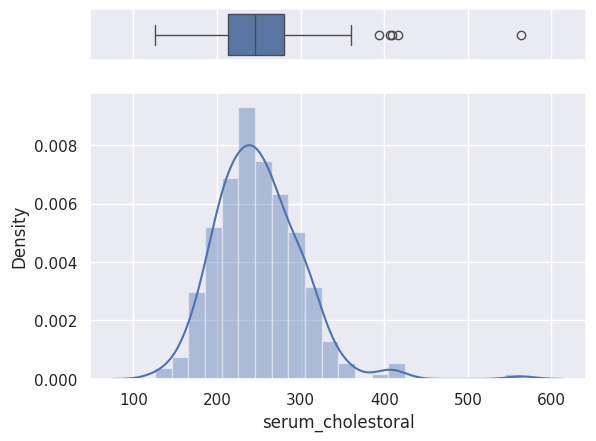

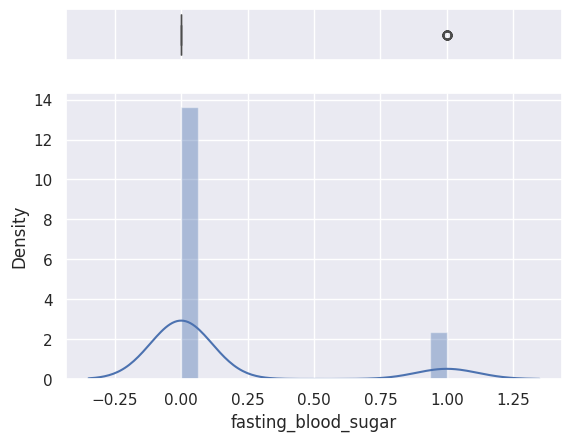

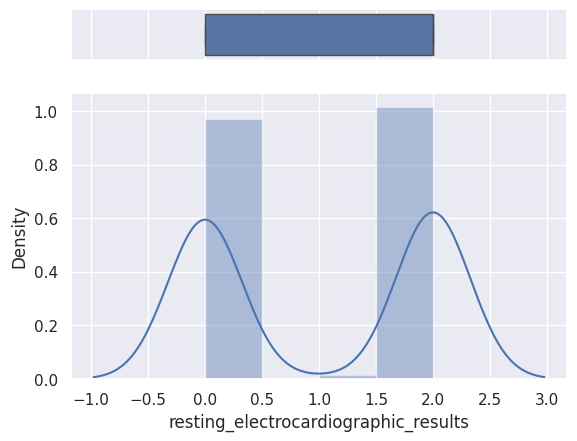

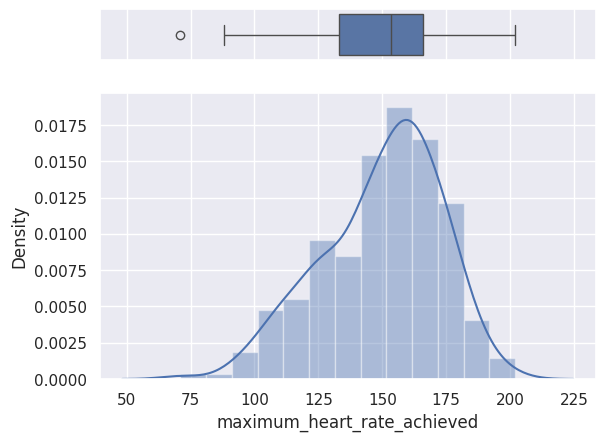

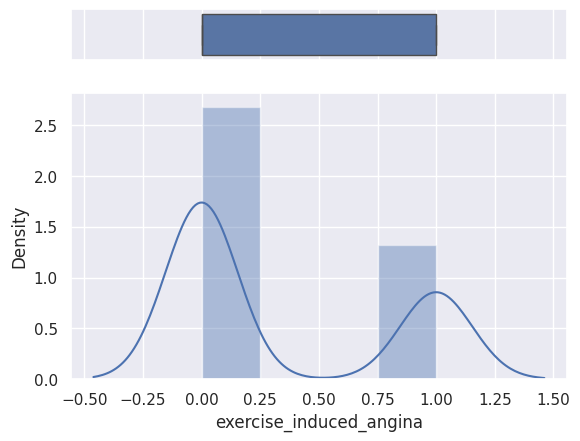

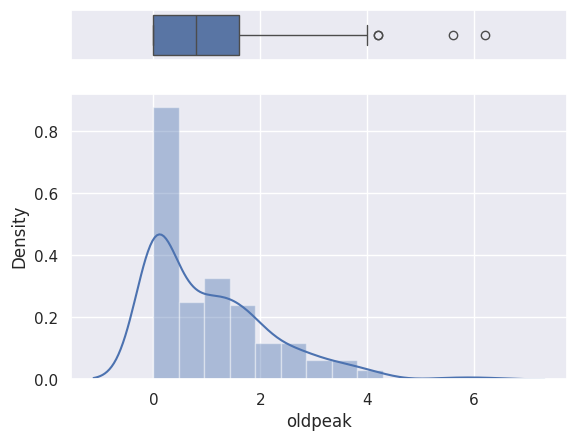

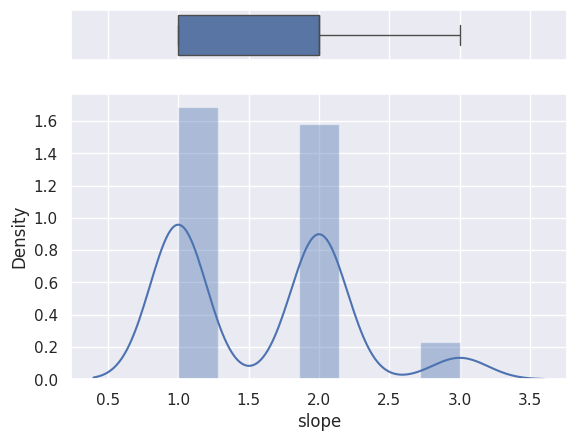

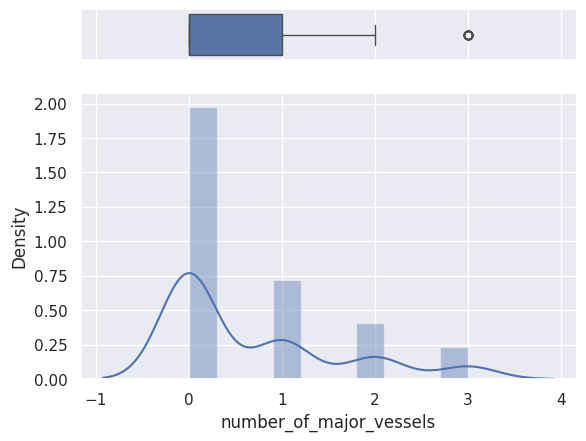

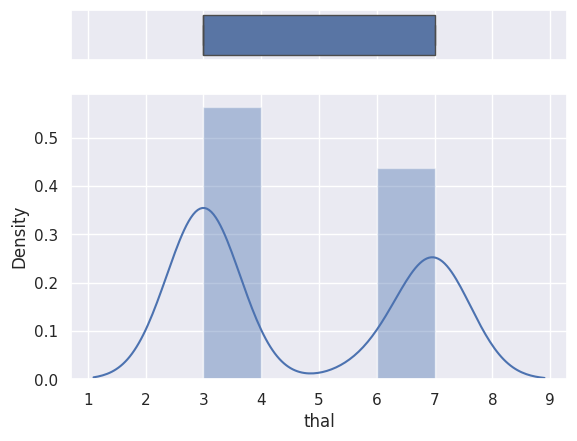

In [ ]:
# Analisis exploratorio
# Sesgada
# graficara e histograma para todas las columnas que no sean la clase
for c in data.columns:
  if c != "class":
    # gridspec_kw: Proporcion del tamaño de la pantalla que queremos
    f, (ax_box, ax_hist) = plt.subplots\
     (2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
    sns.set(style="darkgrid")
    # Grafica de bigotes (boxplot)
    sns.boxplot(data[c], orient='h', ax = ax_box)
    sns.distplot(data[c], ax = ax_hist)
    ax_box.set(xlabel=c)
    plt.show()

<Axes: >

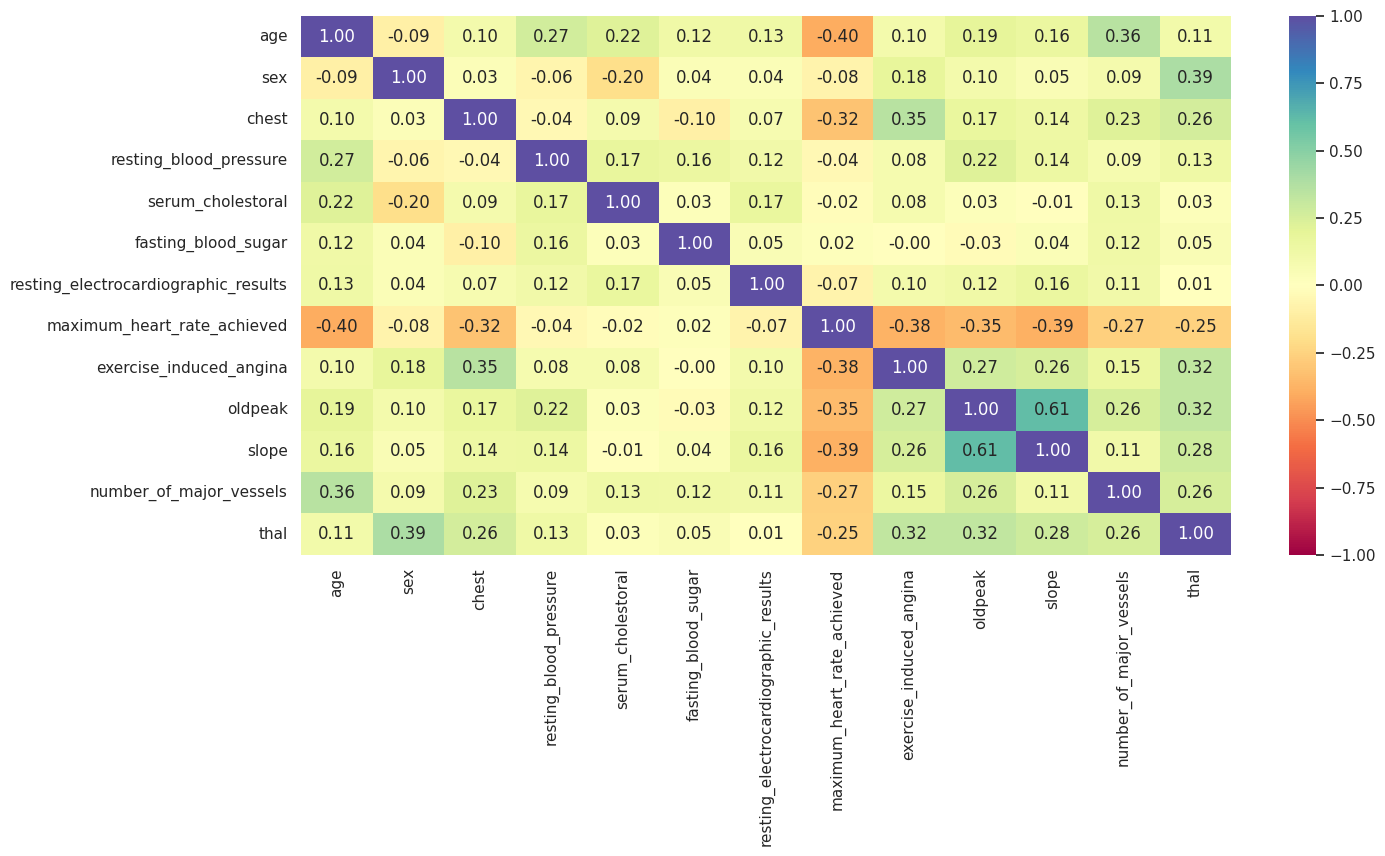

In [ ]:
# Graficar las coorelaciones
plt.figure(figsize=(15,7))
sns.heatmap(data.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")

Falta ver si hai correlaciones con la variable objetivo

## 26/02/2024

In [ ]:
# Verificar valores faltantes
data.isna().sum()

age                                     0
sex                                     0
chest                                   0
resting_blood_pressure                  0
serum_cholestoral                       0
fasting_blood_sugar                     0
resting_electrocardiographic_results    0
maximum_heart_rate_achieved             0
exercise_induced_angina                 0
oldpeak                                 0
slope                                   0
number_of_major_vessels                 0
thal                                    0
class                                   0
dtype: int64

Cuando hay faltantes (algo que imputar) se hace despues de separar los datasets

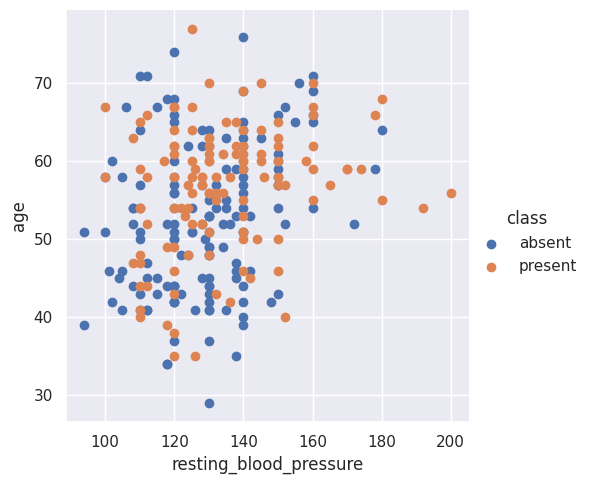

In [ ]:
# Distribucion de los graficos respecto a nuestra clase
sns.FacetGrid(df, hue='class', height=5).map(plt.scatter, "resting_blood_pressure", "age").add_legend()

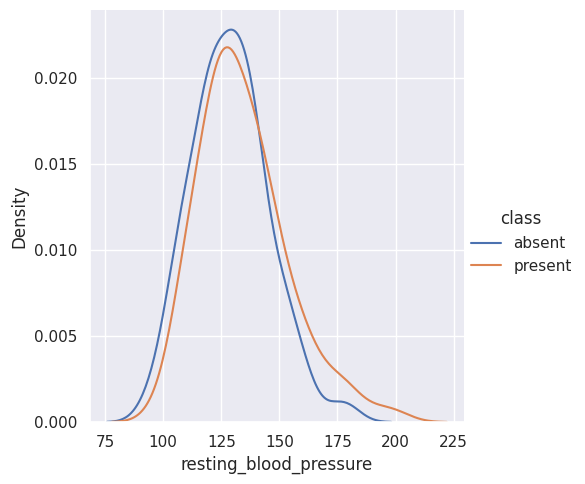

In [ ]:
# presencia y ausencia de enferemedades dependiendo la presion arterial
sns.FacetGrid(df, hue='class', height=5).map(sns.kdeplot, "resting_blood_pressure").add_legend()

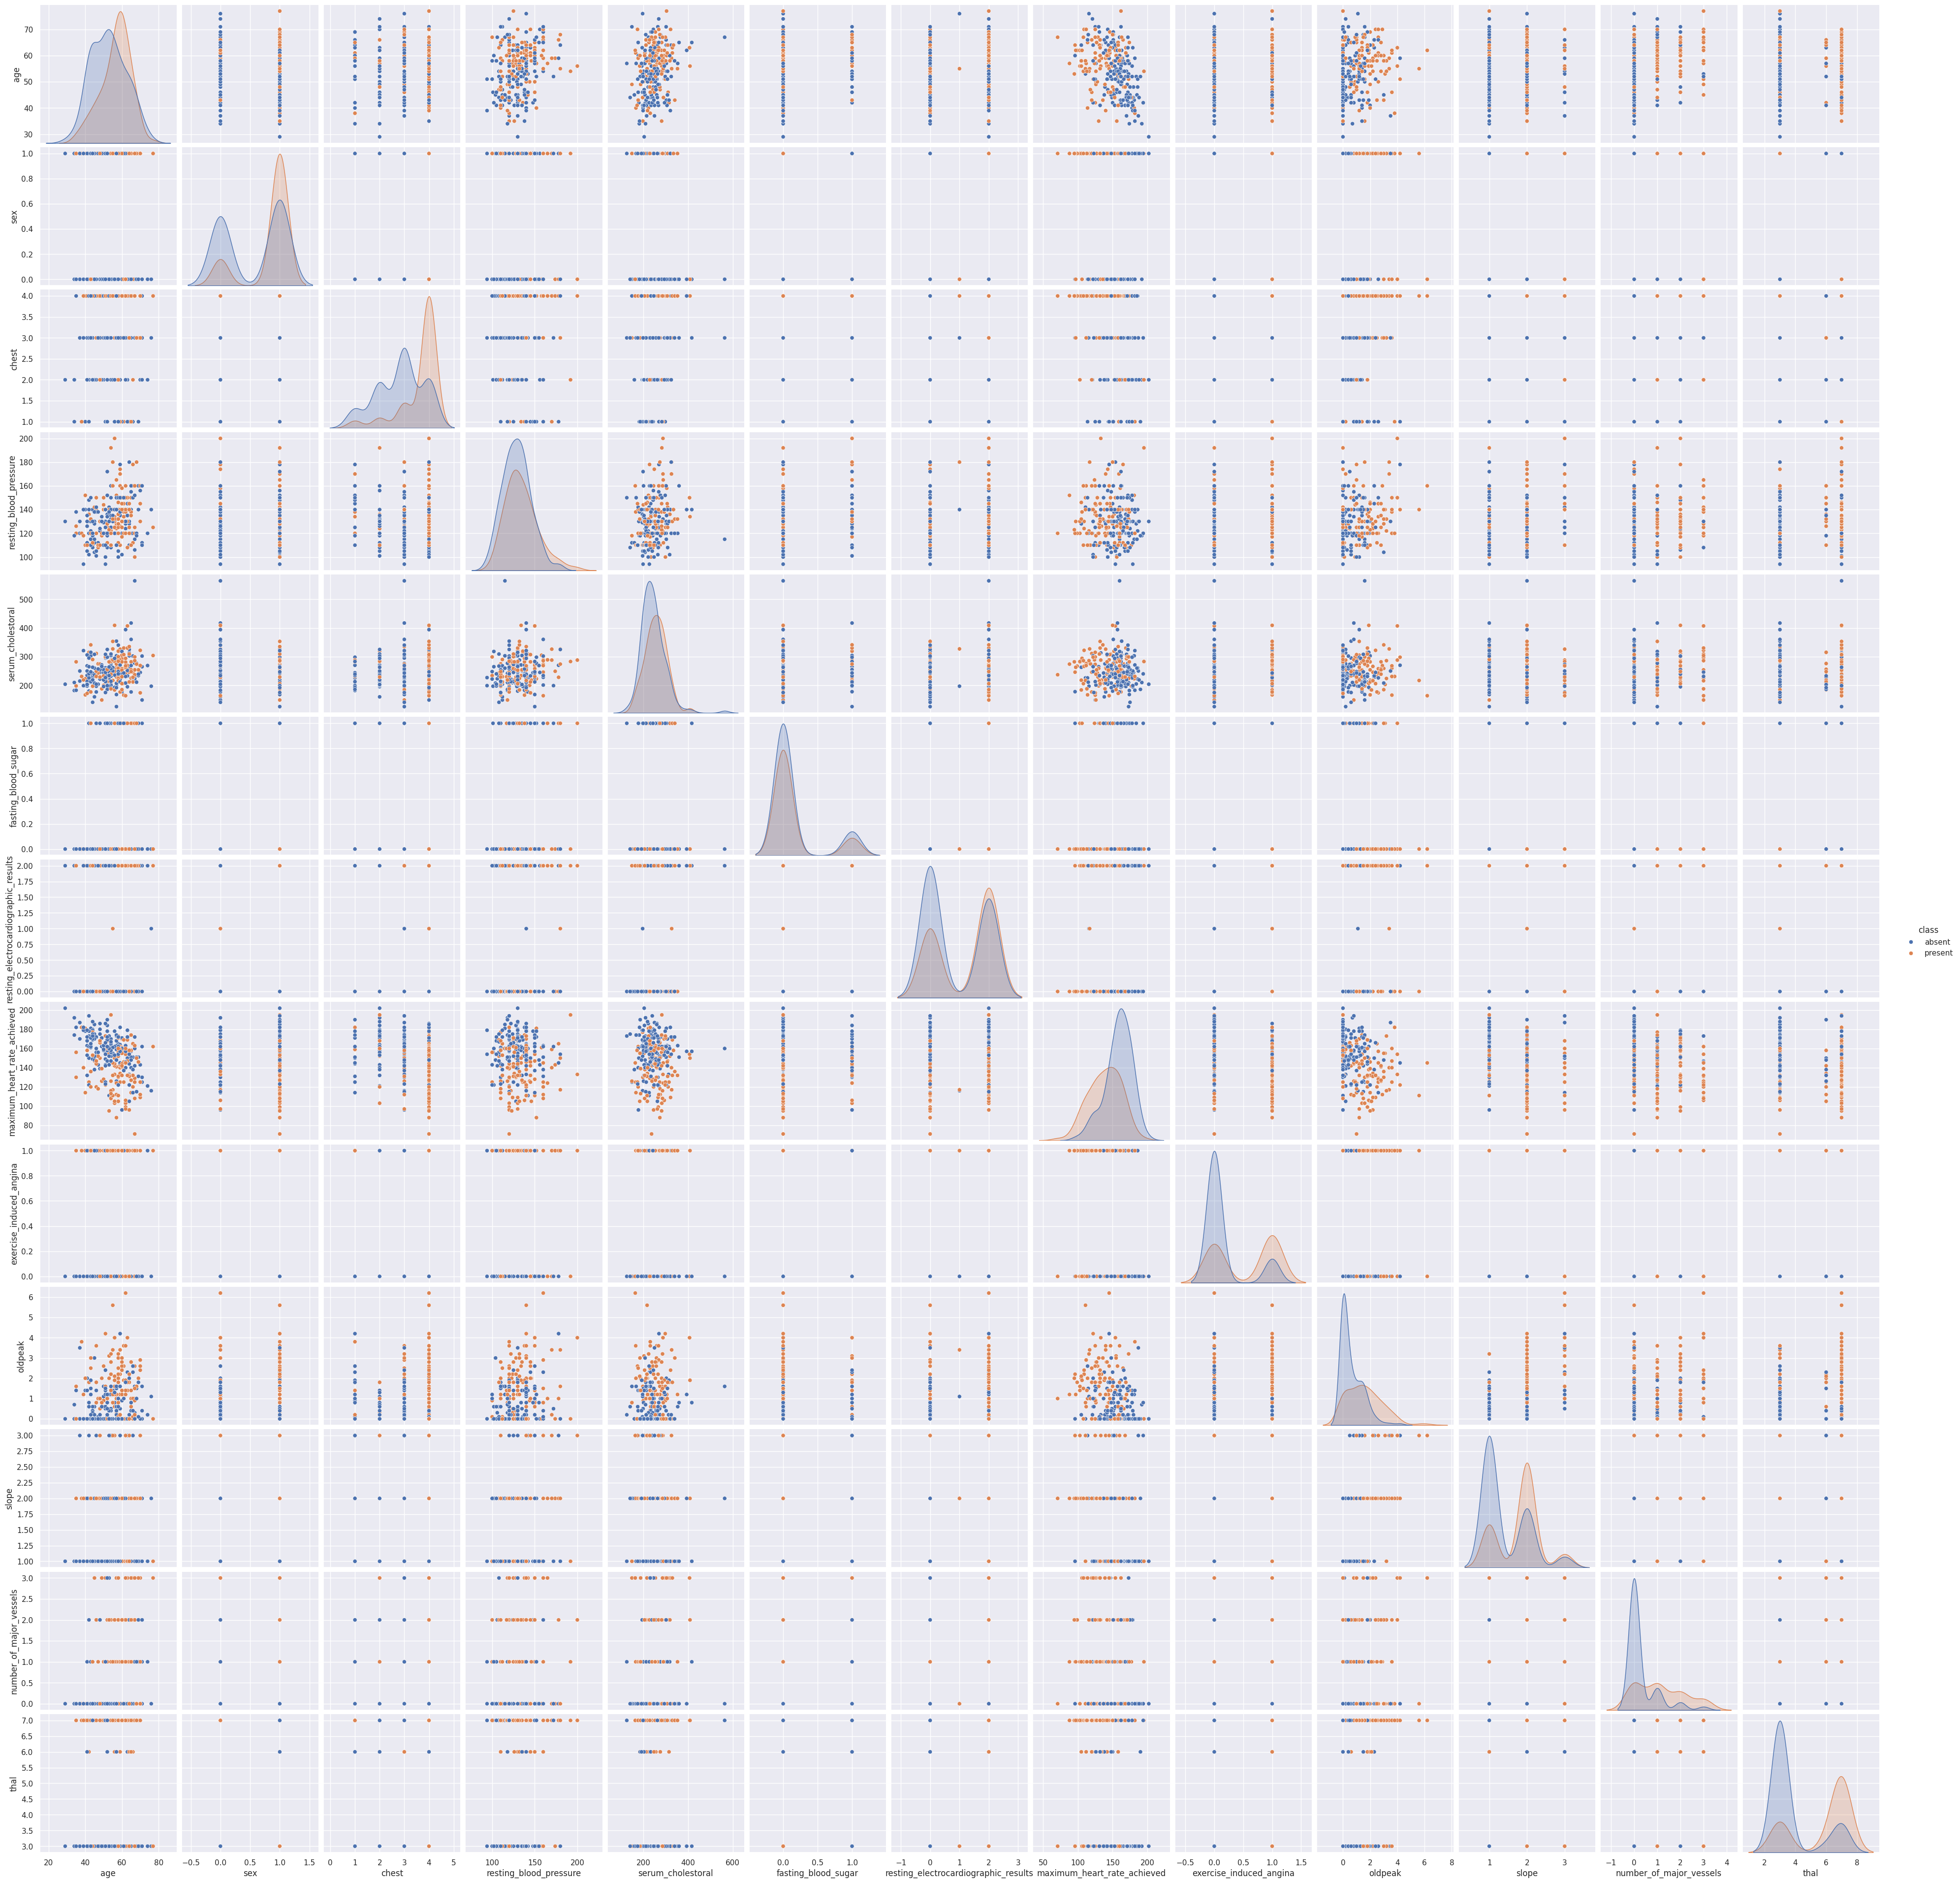

In [ ]:
# Grafica de comparacion de todas las numericas contra todas las numericas
sns.pairplot(df, hue="class", height=3)

In [ ]:
# Variables explicativas
X = data.drop(["class"], axis = 1)
# Variable objetivo
y = data["class"]

Hasta aqui se estaba trabajando unicamente con el analisis exploratorio

In [ ]:
# Separacion del dataset teniendo variables para entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)
print(X_train.shape, X_test.shape)

(189, 13) (81, 13)


In [ ]:
X_train

,age,sex,chest,resting_blood_pressure,serum_cholestoral,fasting_blood_sugar,resting_electrocardiographic_results,maximum_heart_rate_achieved,exercise_induced_angina,oldpeak,slope,number_of_major_vessels,thal
71,57.0,0.0,4.0,120.0,354.0,0.0,0.0,163.0,1.0,0.6,1.0,0.0,3.0
104,63.0,1.0,4.0,130.0,254.0,0.0,2.0,147.0,0.0,1.4,2.0,1.0,7.0
0,70.0,1.0,4.0,130.0,322.0,0.0,2.0,109.0,0.0,2.4,2.0,3.0,3.0
242,53.0,0.0,4.0,130.0,264.0,0.0,2.0,143.0,0.0,0.4,2.0,0.0,3.0
224,35.0,0.0,4.0,138.0,183.0,0.0,0.0,182.0,0.0,1.4,1.0,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
24,54.0,0.0,2.0,132.0,288.0,1.0,2.0,159.0,1.0,0.0,1.0,1.0,3.0
105,48.0,1.0,4.0,124.0,274.0,0.0,2.0,166.0,0.0,0.5,2.0,0.0,7.0
147,40.0,1.0,4.0,110.0,167.0,0.0,2.0,114.0,1.0,2.0,2.0,0.0,7.0
102,49.0,0.0,4.0,130.0,269.0,0.0,0.0,163.0,0.0,0.0,1.0,0.0,3.0


In [ ]:
# Vamos a codificar las variables
X_train = pd.get_dummies(X_train, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)
print(X_train.shape, X_test.shape)

(189, 13) (81, 13)


In [ ]:
# Sacamos y graficamos la matrtiz de confusion
# https://pastebin.com/nNgDpmMr
# -- Funcion metricas de clasificacion
def metrics_score(actual, predicted):
    print(classification_report(actual, predicted))
    cm = confusion_matrix(actual, predicted)
    plt.figure(figsize=(8,5))
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels=['Not Attrite', 'Attrite'], yticklabels=['Not Attrite', 'Attrite'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

Clasificacion = clases

Regresion = numeros continuos

### Cracion del modelo (arbol de clasificacion)

In [ ]:
# Creacion del Modelo (arbol de clasificacion)
  #  Niveles de nodos (max_depth)
treeclass = DecisionTreeClassifier(max_depth=5, random_state=1)
treeclass.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=1)

[Text(0.5034722222222222, 0.9166666666666666, 'node #0\nthal <= 4.5\ngini = 0.494\nsamples = 189\nvalue = [105, 84]\nclass = absence'),
 Text(0.25, 0.75, 'node #1\noldpeak <= 2.8\ngini = 0.315\nsamples = 102\nvalue = [82, 20]\nclass = absence'),
 Text(0.2222222222222222, 0.5833333333333334, 'node #2\nnumber_of_major_vessels <= 0.5\ngini = 0.284\nsamples = 99\nvalue = [82, 17]\nclass = absence'),
 Text(0.1111111111111111, 0.4166666666666667, 'node #3\nage <= 58.5\ngini = 0.155\nsamples = 71\nvalue = [65, 6]\nclass = absence'),
 Text(0.05555555555555555, 0.25, 'node #4\nresting_blood_pressure <= 109.0\ngini = 0.038\nsamples = 51\nvalue = [50, 1]\nclass = absence'),
 Text(0.027777777777777776, 0.08333333333333333, '\n  (...)  \n'),
 Text(0.08333333333333333, 0.08333333333333333, '\n  (...)  \n'),
 Text(0.16666666666666666, 0.25, 'node #7\nserum_cholestoral <= 242.0\ngini = 0.375\nsamples = 20\nvalue = [15, 5]\nclass = absence'),
 Text(0.1388888888888889, 0.08333333333333333, '\n  (...)  \

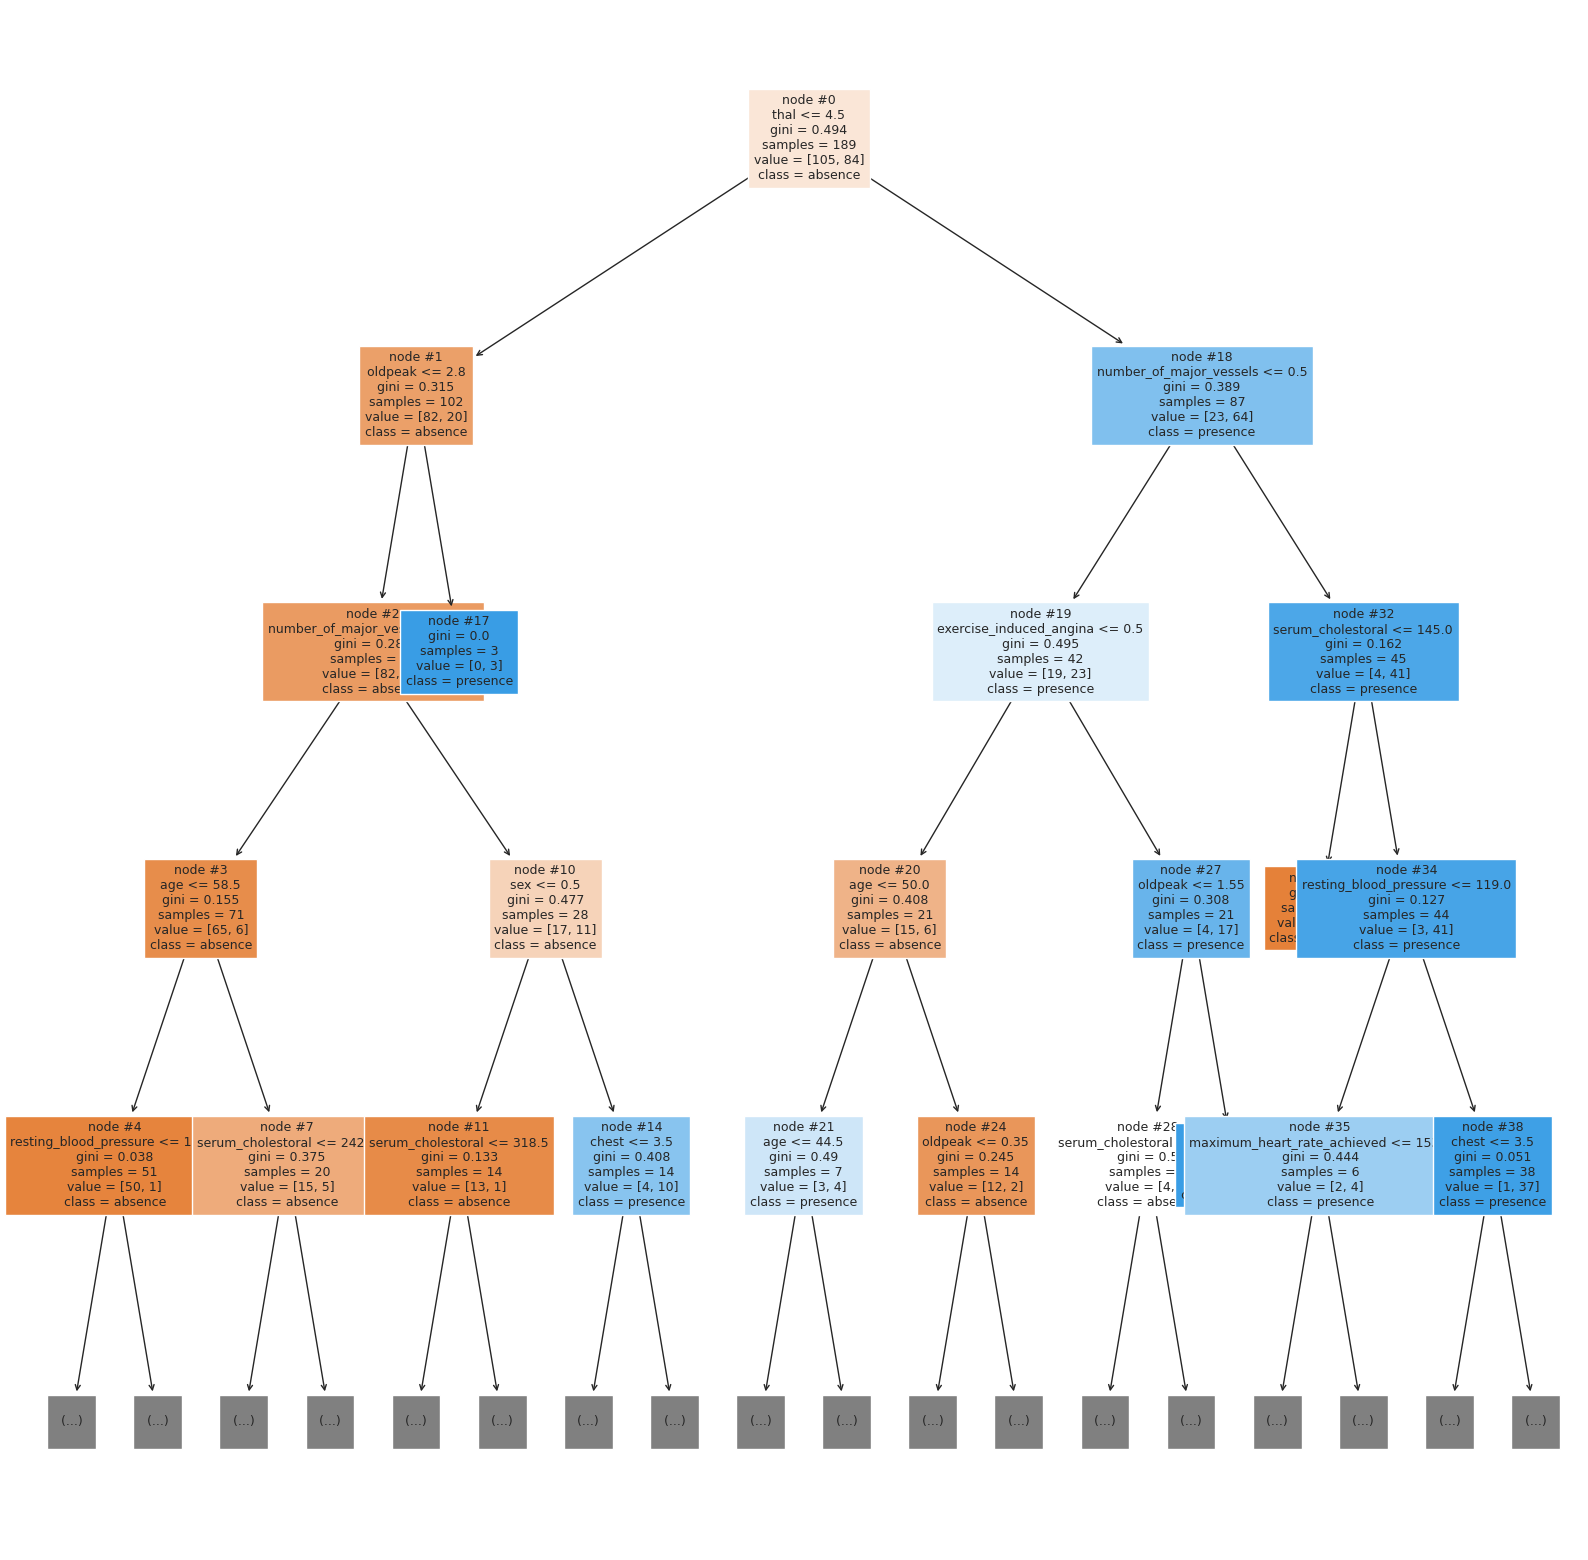

In [ ]:
features = list(X_train.columns)
plt.figure(figsize=(20,20))
class_name = ['absence', 'presence']
# max_depth de la graficacion
tree.plot_tree(
    treeclass,
    feature_names = features,
    max_depth = 4, filled = True, fontsize = 9,
    node_ids = True,
    class_names = class_name
)